DORNA

In [51]:
import numpy as np
dorna = np.load(f'ENT_clean_DORNA.npy',allow_pickle=True)

In [45]:
dorna[5]

{'sent1': 'داستانهای افسانه ای ارزش خود را دارند ، اما پنهان کاری کثیف است.',
 'sent2': 'پنهان کردن چیزها فقط کثیف است ، در حالی که در داستان افسانه ای، جلال وجود دارد',
 'label': 'e',
 'response': 'Contradiction'}

In [52]:
dorna_true_labels = []
dorna_predicted_lebels = []
for item in dorna:
    dorna_true_labels.append(item['label'])
    dorna_predicted_lebels.append(item['response'])

In [59]:
for index,item in enumerate(dorna_true_labels):

    if 'e' in item:
        item = 'perspective'
    elif 'c' in item:
        item = 'Contradiction'
    else:
        item = 'neutral'

    dorna_true_labels[index] = item
# np.save(f'SA_clean_LLAMA3.npy', np.array(clean_data, dtype=object))

In [60]:
unique_values= np.unique(dorna_true_labels, return_inverse=True)
unique_values

(array(['Contradiction', 'neutral', 'perspective'], dtype='<U13'),
 array([0, 1, 1, ..., 1, 1, 2], dtype=int64))

In [55]:
for index,item in enumerate(dorna_predicted_lebels):

    if 'perspective' in item:
        item = 'perspective'
    elif 'Contradiction' in item:
        item = 'Contradiction'
    else:
        item = 'neutral'

    dorna_predicted_lebels[index] = item
# np.save(f'ENT_clean_DORNA.npy', np.array(dorna_predicted_lebels, dtype=object))

In [57]:
unique_values= np.unique(dorna_predicted_lebels, return_inverse=True)
unique_values

(array(['Contradiction', 'neutral', 'perspective'], dtype='<U13'),
 array([2, 2, 2, ..., 2, 0, 0], dtype=int64))

In [61]:
from sklearn.metrics import f1_score

# Calculate Macro F1-score
macro_f1 = f1_score(dorna_true_labels, dorna_predicted_lebels, average='macro')

print(f'Macro F1-score: {macro_f1}')

Macro F1-score: 0.4905200682866586


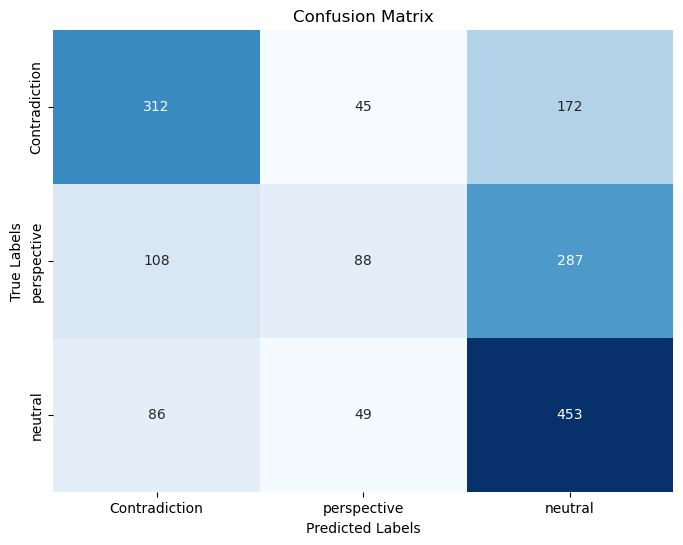

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def plot_confusion_matrix(true_labels, predicted_labels , filename):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Contradiction', 'perspective' , 'neutral'], yticklabels=['Contradiction', 'perspective' , 'neutral'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for dorna')
    plt.savefig(filename)
    plt.show()

plot_confusion_matrix(dorna_true_labels, dorna_predicted_lebels , 'Confusion Matrix for dorna')

LLAMA3

In [65]:
import numpy as np
llama = np.load(f'ENT_clean_LLAMA3.npy',allow_pickle=True)

llama_true_labels = []
llama_predicted_lebels = []
for item in llama:
    llama_true_labels.append(item['label'])
    llama_predicted_lebels.append(item['response'])

In [66]:
for index,item in enumerate(llama_true_labels):

    if 'e' in item:
        item = 'perspective'
    elif 'c' in item:
        item = 'Contradiction'
    else:
        item = 'neutral'

    llama_true_labels[index] = item

In [67]:
unique_values= np.unique(llama_true_labels, return_inverse=True)
unique_values

(array(['Contradiction', 'neutral', 'perspective'], dtype='<U13'),
 array([0, 1, 1, ..., 1, 0, 1], dtype=int64))

In [68]:
for index,item in enumerate(llama_predicted_lebels):

    if 'perspective' in item:
        item = 'perspective'
    elif 'Contradiction' in item:
        item = 'Contradiction'
    else:
        item = 'neutral'

    llama_predicted_lebels[index] = item

In [69]:
unique_values= np.unique(llama_predicted_lebels, return_inverse=True)
unique_values

(array(['Contradiction', 'neutral', 'perspective'], dtype='<U13'),
 array([2, 2, 1, ..., 2, 2, 0], dtype=int64))

In [70]:
from sklearn.metrics import f1_score

# Calculate Macro F1-score
macro_f1 = f1_score(llama_true_labels, llama_predicted_lebels, average='macro')

print(f'Macro F1-score: {macro_f1}')

Macro F1-score: 0.47926076439342863


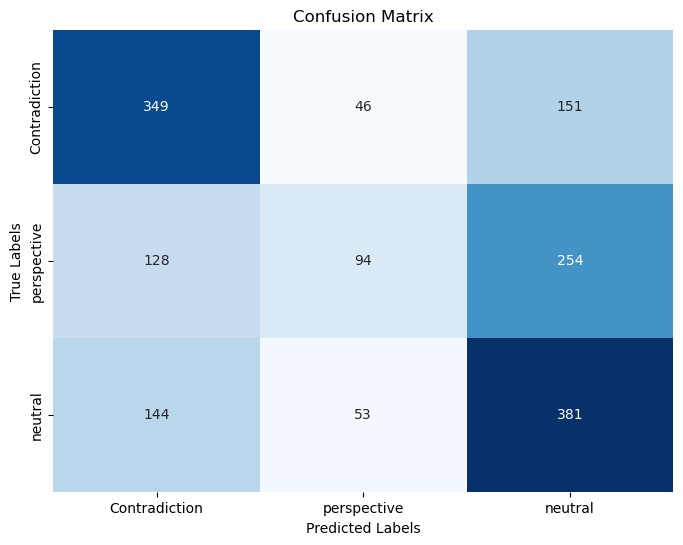

In [71]:
plot_confusion_matrix(llama_true_labels, llama_predicted_lebels)